In [24]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
cd drive/MyDrive/deeplearningprojects/maskdetection/

Listing Directories



In [26]:
x=[]
y=[]
train_data=os.listdir("/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/")
len(train_data)

2

In [27]:
print(train_data)

['without_mask', 'with_mask']


In [28]:
train_data=os.listdir("/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/")
x=[]
y=[]
for each in train_data:
  image_data=os.listdir("/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/" + each)
  #print(image_data)
  for image in image_data:
    img="/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/" + each +'/' + image
    #print(img)
    img=cv2.imread(img,0)
    img=cv2.resize(img,(200,200))
    x.append(img)
    y.append(each)


In [6]:
Mask_path ='/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/with_mask'
withoutMask_path='/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/without_mask'
path="/content/drive/MyDrive/deeplearningprojects/maskdetection/dataset/"

In [7]:
print("The number of images with facemask labelled 'with mask':",len(os.listdir(Mask_path)))
print("The number of images with facemask labelled 'without mask':",len(os.listdir(withoutMask_path)))

The number of images with facemask labelled 'with mask': 220
The number of images with facemask labelled 'without mask': 227


Visualize the data

In [29]:
def show_img(path):
    images = list()
    for img in random.sample(os.listdir(path),9):
        images.append(img)
    i = 0
    fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(30,20))
    for row in range(3):
        for col in range(3):
            ax[row,col].imshow(cv2.imread(os.path.join(path,images[i])))
            i+=1

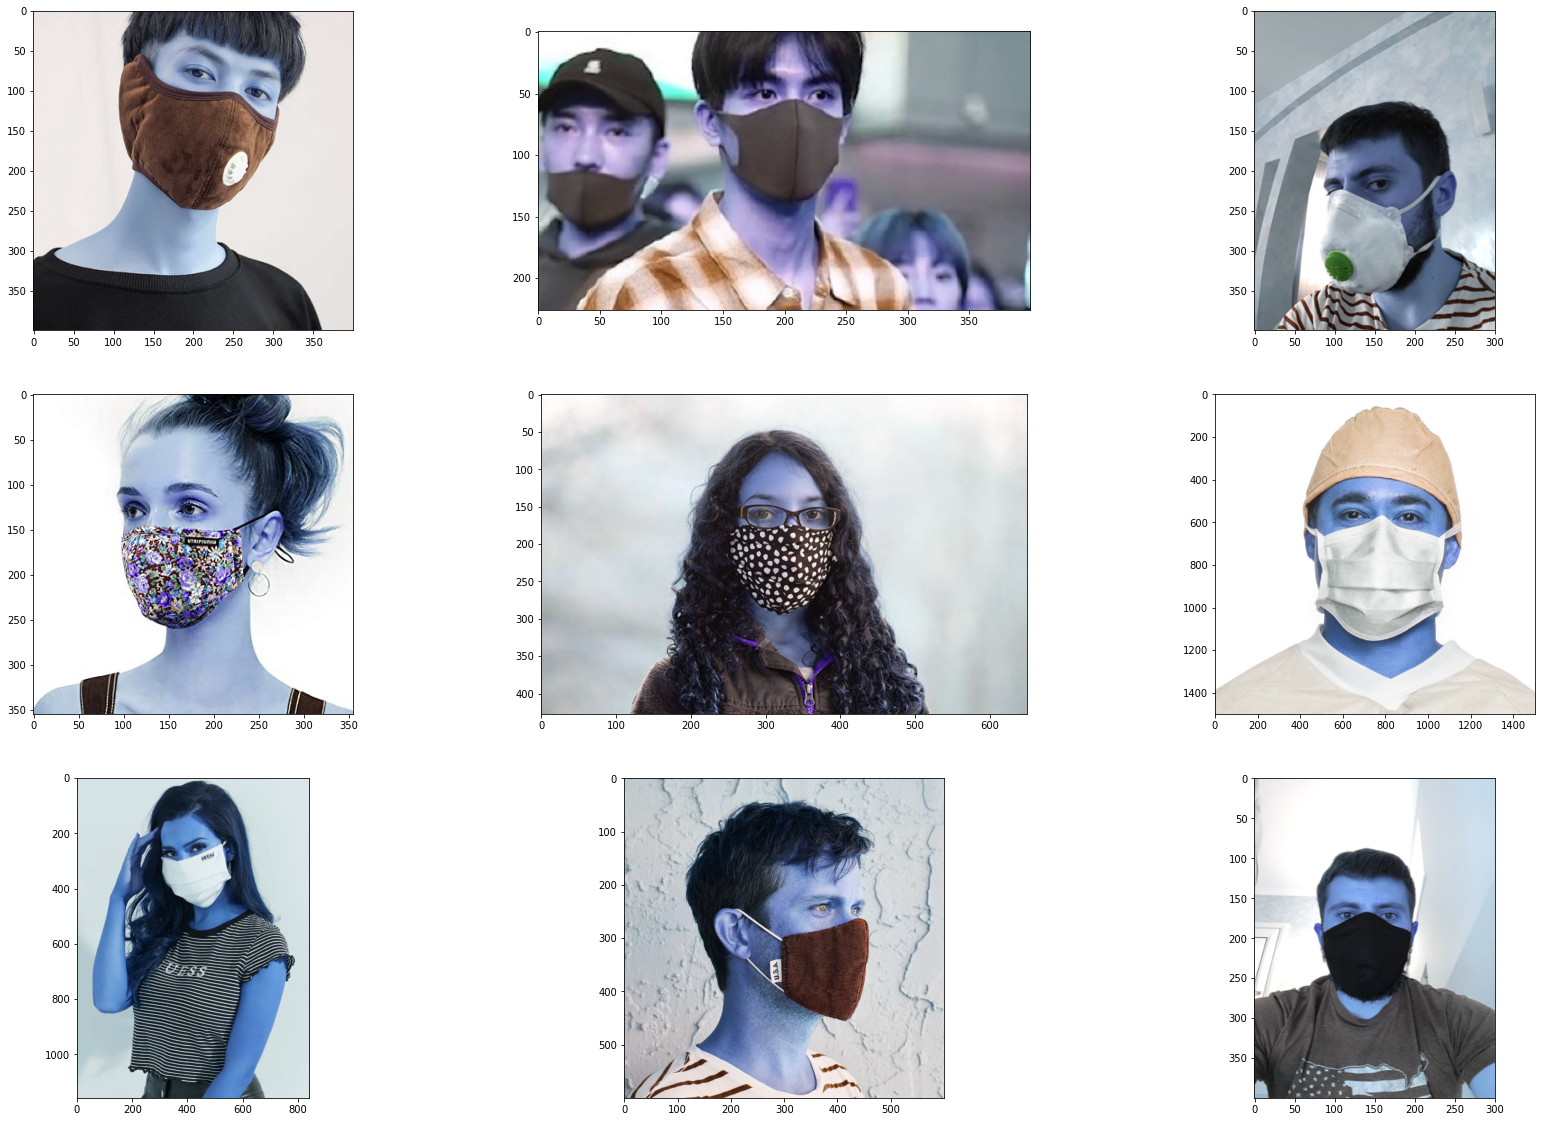

In [30]:
show_img(Mask_path)

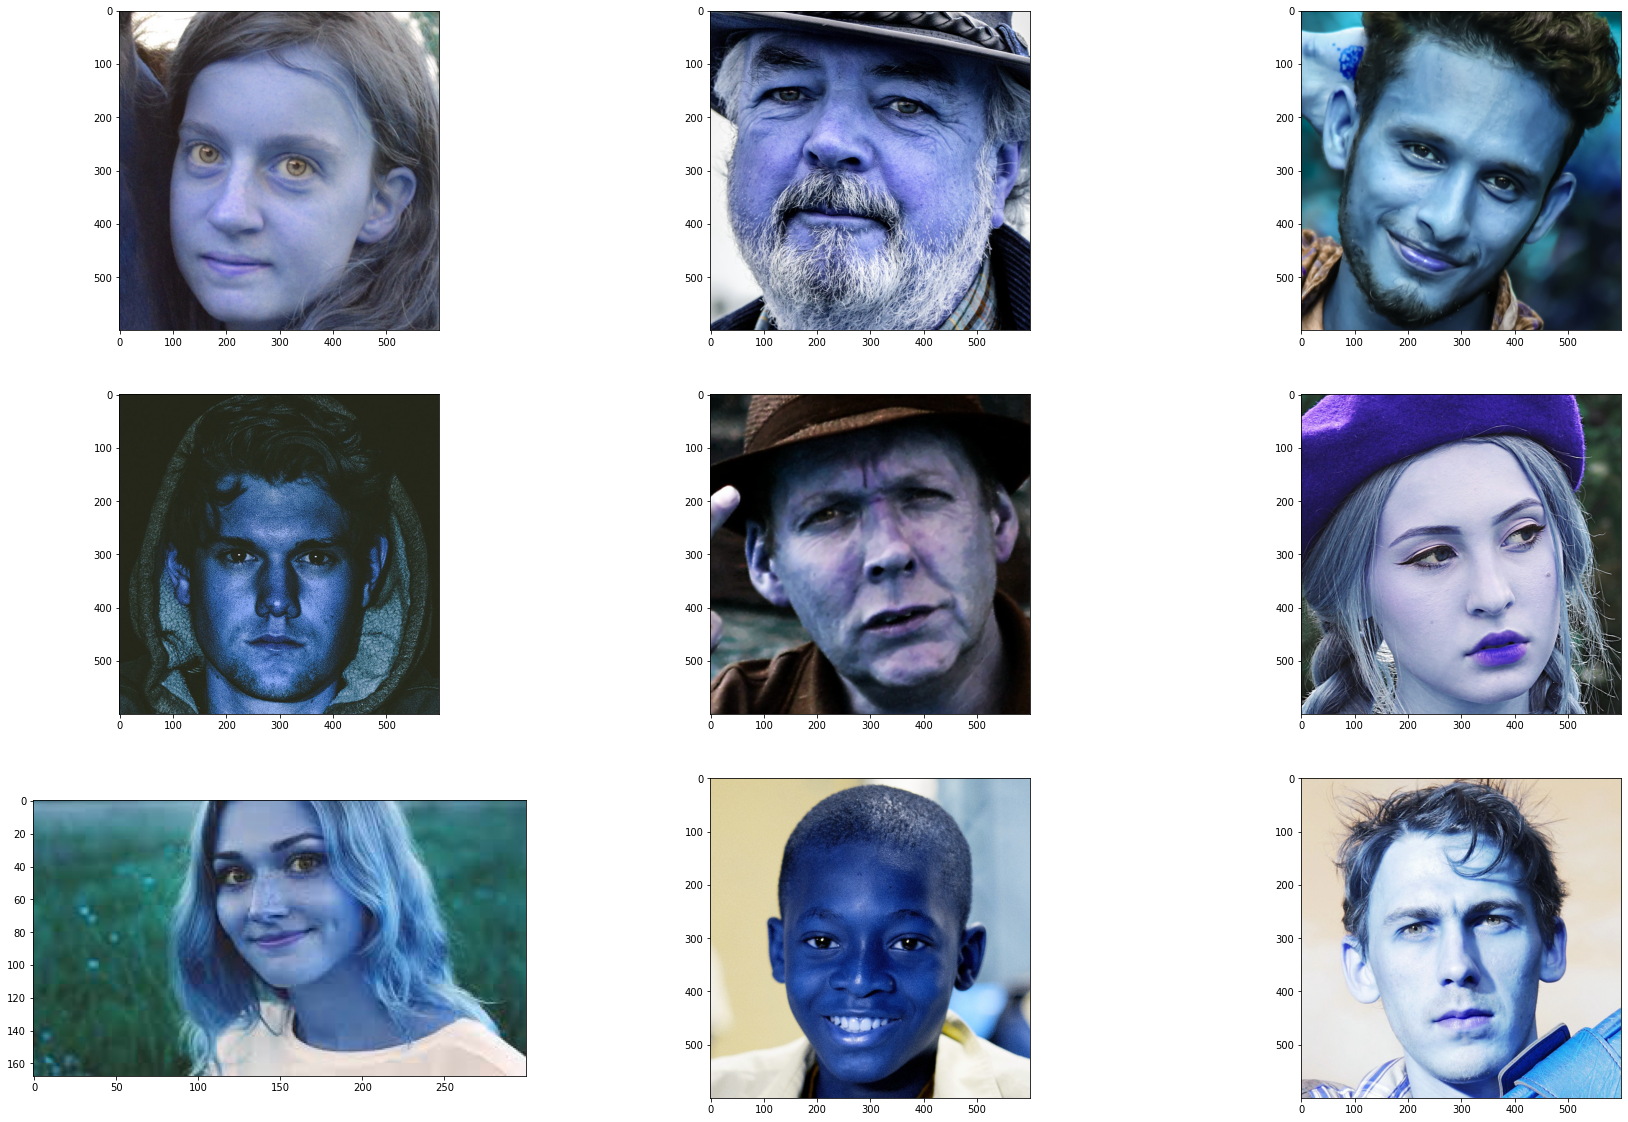

In [11]:
show_img(withoutMask_path)


Label Encoder

In [31]:
le=LabelEncoder()
y_train=le.fit_transform(y)


Converting to array

In [32]:
import numpy as np
x=np.array(x)
y=np.array(y_train)

In [33]:
y.shape,x.shape


((447,), (447, 200, 200))

Label

In [34]:
set(y)

{0, 1}

Reshape

In [35]:

x=x.reshape(447,200,200,1)

In [36]:
x.shape

(447, 200, 200, 1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Conv2D
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(312, 200, 200, 1) (135, 200, 200, 1) (312,) (135,)


CNN

In [49]:
model=Sequential()

In [50]:
#convolation layer
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(200,200,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D())
model.add(Flatten())

#hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 194, 194, 32)      9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 192, 192, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [52]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=["accuracy"])

In [53]:
model.fit(x_train,y_train,batch_size=20,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
16/16 [==============================] - 7s 234ms/step - loss: 110.1547 - accuracy: 0.5041 - val_loss: 0.6428 - val_accuracy: 0.6370
Epoch 2/10
16/16 [==============================] - 3s 174ms/step - loss: 1.1777 - accuracy: 0.5669 - val_loss: 0.6489 - val_accuracy: 0.7037
Epoch 3/10
16/16 [==============================] - 3s 175ms/step - loss: 1.1858 - accuracy: 0.7110 - val_loss: 0.5030 - val_accuracy: 0.7556
Epoch 4/10
16/16 [==============================] - 3s 175ms/step - loss: 0.4227 - accuracy: 0.8453 - val_loss: 0.5065 - val_accuracy: 0.7704
Epoch 5/10
16/16 [==============================] - 3s 175ms/step - loss: 0.2752 - accuracy: 0.9311 - val_loss: 0.4631 - val_accuracy: 0.8074
Epoch 6/10
16/16 [==============================] - 3s 176ms/step - loss: 0.2038 - accuracy: 0.9481 - val_loss: 0.6740 - val_accuracy: 0.8593
Epoch 7/10
16/16 [==============================] - 3s 175ms/step - loss: 0.2149 - accuracy: 0.9670 - val_loss: 1.0062 - val_accuracy: 0.7185
Epoc

In [54]:
model.save("mask-detection.h5")

In [55]:
from keras.models import load_model
model=load_model("mask-detection.h5")

In [56]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 2s 176ms/step - loss: 0.7304 - accuracy: 0.8444


[0.7304404973983765, 0.8444444537162781]

In [ ]:
ls

LABEL

In [58]:

label={0:'with_mask',1:'without_mask',}

PREDICTION-1IMAGE

In [83]:

i1=cv2.imread("nm.jpg",0)
i1.shape

(168, 300)

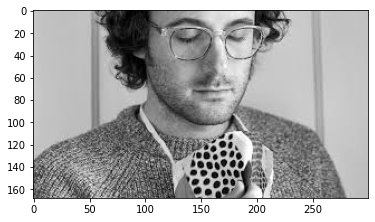

In [84]:

import matplotlib.pyplot as plt

plt.imshow(i1,cmap="gray")

In [85]:
import numpy as np
imagea=np.resize(i1,new_shape=(200,200))
imagea.shape

(200, 200)

In [86]:
image1 = imagea.reshape(1,200,200,1)
image1.shape

(1, 200, 200, 1)

In [87]:
label[model.predict_classes(image1)[0][0]]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'without_mask'

PREDICTION OF 2 ND IMAGE

In [98]:
i2=cv2.imread("m3.jpg",0)
i2.shape

(194, 259)

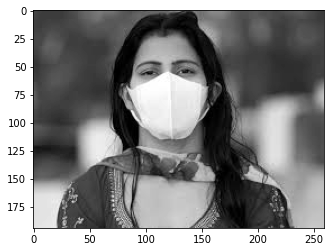

In [99]:
import matplotlib.pyplot as plt

plt.imshow(i2,cmap="gray")

In [100]:
import numpy as np
imageb=np.resize(i2,new_shape=(200,200))
imageb.shape

(200, 200)

In [101]:
image2 = imageb.reshape(1,200,200,1)
image2.shape

(1, 200, 200, 1)

In [102]:

label[model.predict_classes(image2)[0][0]]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'with_mask'